### Méthodes de Monte Carlo





Simuation d'un temps de sortie d'un mouvement Brownien



Exit time τ for interval [−-0.5, 0.5]: 0.1590
P[B_τ = −-0.5]: 0.0000
P[B_τ = 0.5]: 0.0000
E[τ] for interval [−-0.5, 0.5]: 0.2659
E[τ] for interval [−∞, 0.5]: 0.2626


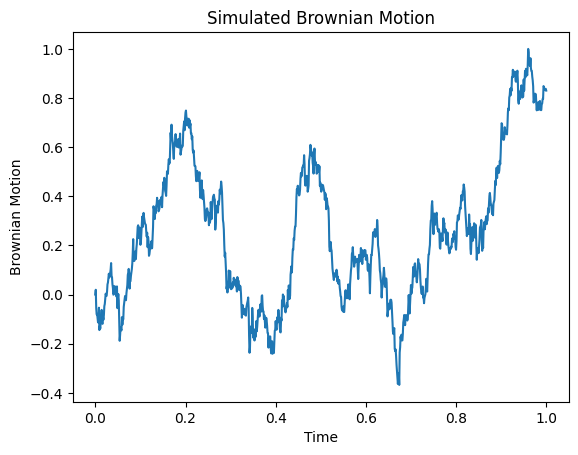

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_brownian_motion(T, m):
    dt = T / m
    Z = np.random.standard_normal(m)
    B = np.zeros(m + 1)

    for i in range(m):
        B[i + 1] = B[i] + np.sqrt(dt) * Z[i]

    return B

def exit_time_interval(B, a, b):
    for i, val in enumerate(B):
        if val <= a or val >= b:
            return i
    return len(B) - 1

# Parameters
T = 1.0  # Total time
m = 1000  # Number of steps
a, b = -0.5, 0.5

# Simulate Brownian motion
B = simulate_brownian_motion(T, m)

# Compute exit times
tau_a = exit_time_interval(B, a, b)
tau_b = exit_time_interval(B, -b, -a)

# Estimate expectations
E_tau_a = np.mean([exit_time_interval(simulate_brownian_motion(T, m), a, b) for _ in range(1000)])
E_tau_b = np.mean([exit_time_interval(simulate_brownian_motion(T, m), -b, -a) for _ in range(1000)])

print(f"Exit time τ for interval [−{a}, {b}]: {tau_a * T / m:.4f}")
print(f"P[B_τ = −{a}]: {np.mean(B[tau_a] == a):.4f}")
print(f"P[B_τ = {b}]: {np.mean(B[tau_b] == b):.4f}")
print(f"E[τ] for interval [−{a}, {b}]: {E_tau_a * T / m:.4f}")
print(f"E[τ] for interval [−∞, {b}]: {E_tau_b * T / m:.4f}")

# Plot Brownian motion
plt.plot(np.linspace(0, T, m + 1), B)
plt.xlabel("Time")
plt.ylabel("Brownian Motion")
plt.title("Simulated Brownian Motion")
plt.show()

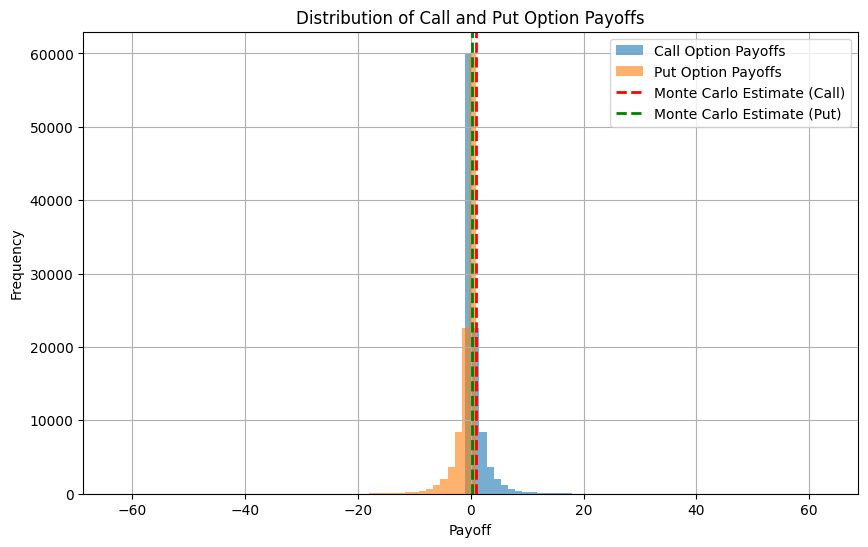

Monte Carlo estimate for C: 0.8876
Exact formula for C: 0.8871
Monte Carlo estimate for P: 0.2394
Exact formula for P: -0.3244


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Parameters
beta = 1
K = 1
n = 10**5  # Number of simulations

# Simulate G (standard Gaussian)
G = np.random.normal(size=n)

# Calculate call option price C
C_MC = np.mean(np.maximum(np.exp(beta * G) - K, 0))
C_exact = np.exp(beta**2 / 2) * stats.norm.cdf(beta - np.log(K) / beta) - K * stats.norm.cdf(-np.log(K) / beta)

# Calculate put option price P
P_MC = np.mean(np.maximum(K - np.exp(beta * G), 0))
P_exact = K * stats.norm.cdf(np.log(K) / beta) - np.exp(beta**2 / 2) * stats.norm.cdf(-np.log(K) / beta)

# Plot histograms of simulated payoffs
plt.figure(figsize=(10, 6))
plt.hist(np.exp(beta * G) - K, bins=50, alpha=0.6, label="Call Option Payoffs")
plt.hist(K - np.exp(beta * G), bins=50, alpha=0.6, label="Put Option Payoffs")
plt.axvline(C_MC, color='r', linestyle='dashed', linewidth=2, label="Monte Carlo Estimate (Call)")
plt.axvline(P_MC, color='g', linestyle='dashed', linewidth=2, label="Monte Carlo Estimate (Put)")
plt.xlabel("Payoff")
plt.ylabel("Frequency")
plt.title("Distribution of Call and Put Option Payoffs")
plt.legend()
plt.grid(True)
plt.show()

print(f"Monte Carlo estimate for C: {C_MC:.4f}")
print(f"Exact formula for C: {C_exact:.4f}")
print(f"Monte Carlo estimate for P: {P_MC:.4f}")
print(f"Exact formula for P: {P_exact:.4f}")